In [15]:
import numpy as np
import scipy
from activ import load_data
from activ.readfile import load_preprocessed
from sklearn.model_selection import train_test_split
from sklearn.cluster import DBSCAN
from activ.data_normalization import data_normalization
from scipy.spatial.distance import pdist
from sklearn.model_selection import KFold
import pandas as pd
from activ.readfile import TrackTBIFile
import matplotlib.pyplot as plt

In [ ]:
I need histograms of data features

please take the biomarker and outcome features with highest leverage scores in the NMFs, and plot histograms of those.
Please also make these plots for GCS and GOSE
thanks
i would also like to have plots of biomarker and outcome reconstruction accuracy as a function of NMF bases.

In [24]:
subdata = load_data()
sub_oc_features = subdata.outcome_features
sub_bm_features = subdata.biomarker_features
sub_oc = subdata.outcomes
sub_bm = subdata.biomarkers

In [35]:
nmfdata = load_data(uoinmf=True)
oc_features = nmfdata.outcome_features
bm_features = nmfdata.biomarker_features
nmf_oc_bases = nmfdata.outcome_bases
nmf_bm_bases = nmfdata.biomarker_bases

oc_values = sorted(nmf_oc_bases.sum(axis=0))[::-1]
bm_values = sorted(nmf_bm_bases.sum(axis=0))[::-1]

oc_rank_features = oc_features[np.argsort(-nmf_oc_bases.sum(axis=0))]
bm_rank_features = bm_features[np.argsort(-nmf_bm_bases.sum(axis=0))]

In [37]:
highest_bm = bm_rank_features[:5]
highest_oc = oc_rank_features[:5]

GOSE_Reponder6M_Patient.alone 24


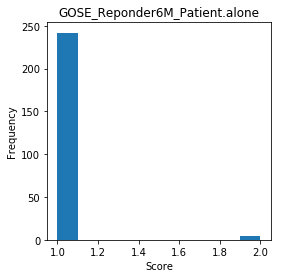

GOSE_OtherIssues6M 29


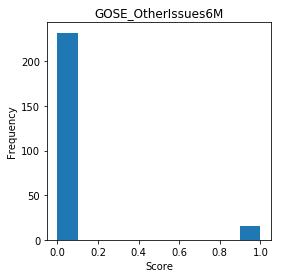

NeuroSleepSleepingLess6mo 43


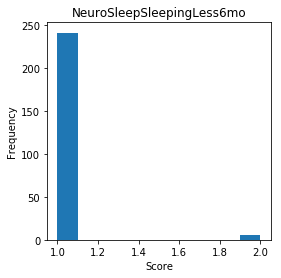

NeuroSleepTroubleFallingAsleep6mo 45


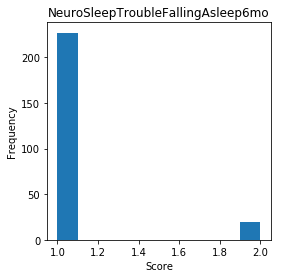

NeuroEmotionalIrritability6mo 50


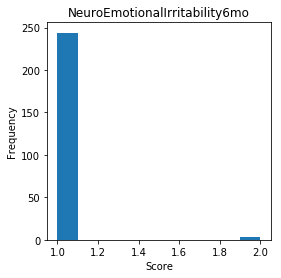

In [38]:
for ii,f in enumerate(sub_oc_features):
    if f in highest_oc:
        print(f,ii)
        plt.figure(figsize=(4,4))
        plt.hist(sub_bm[:,ii])
        plt.title('{}'.format(f))
        plt.xlabel('Score')
        plt.ylabel('Frequency')
        plt.show()

PatientTypeCoded_ED.Discharge 89


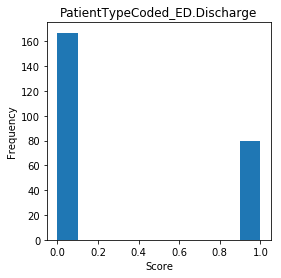

injurytype_Closed 92


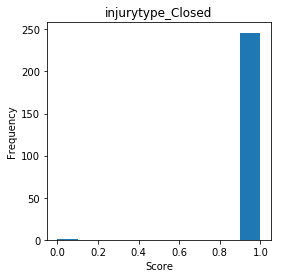

PresArrivalMethod_Ambulance 101


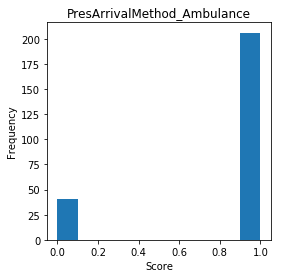

admGCSeyes 106


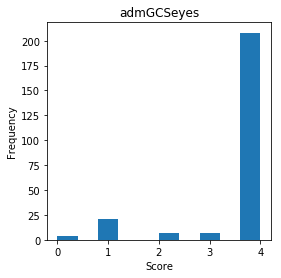

DispER_Discharge.Home 128


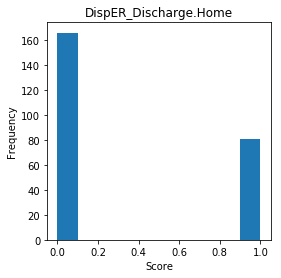

In [39]:
for ii,f in enumerate(sub_bm_features):
    if f in highest_bm:
        print(f,ii)
        plt.figure(figsize=(4,4))
        plt.hist(sub_bm[:,ii])
        plt.title('{}'.format(f))
        plt.xlabel('Score')
        plt.ylabel('Frequency')
        plt.show()